In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
df = pd.read_csv('Validation error of 25 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,-21.633348,-19.864979,109.480972,-3.989194,30.379885,35.936167,-12.538791,3.289867e+27,2000.000000,...,-9.466183,-4.093484,-9.466183,2.578158e+27,1602.700412,-8.575071,7.458013e+07,-12.341999,-5.564526,-8.279238
1,0,-13.915094,5.321752,119.772461,33.839247,-31.089310,26.546733,104.255573,3.289867e+27,1444.444448,...,-16.629781,-13.047982,-4.093484,2.832079e+27,1521.314204,-8.996351,7.485468e+07,-11.459697,-16.511795,-8.361170
2,0,2.143680,-17.733144,28.050915,10.695446,28.035576,-2.332338,-40.061142,2.530667e+27,1888.888896,...,-9.466183,-7.675284,-14.838882,2.584916e+27,1553.929508,-9.828271,7.394881e+07,-12.120082,-7.496270,-8.894256
3,0,-26.435119,37.665493,280.712950,12.305931,170.251938,55.178015,-31.631909,3.796000e+27,1111.111112,...,-4.093484,-9.466183,-11.257083,2.792523e+27,1529.616594,-8.766239,7.502468e+07,-11.062721,-14.689435,-7.696253
4,0,57.816677,55.710447,80.676407,-3.074657,-18.073319,-6.222408,77.942066,1.771467e+27,1000.000000,...,-13.047982,-18.420681,-4.093484,2.795670e+27,1557.104468,-7.395960,7.529053e+07,-10.689779,-17.274471,-7.284031


In [3]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,...,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000
mean,0.0,7.177095,21.028167,41.031087,-1.110595,52.726564,49.067678,22.281429,2.773611e+27,1395.555562,...,-9.537819,-8.320007,-10.254179,2.751670e+27,1618.474184,-9.596102,7.738242e+07,-10.223608,-10.120576,-8.020992
std,0.0,33.653981,24.600543,68.743084,20.246046,95.354861,65.663569,101.639806,7.175679e+26,309.453258,...,5.458572,4.955541,5.688749,2.017943e+26,86.268637,3.676941,4.131291e+06,2.295066,4.230254,3.168173
min,0.0,-27.872533,-19.864979,-46.614157,-27.224380,-49.455990,-19.019818,-76.955359,1.518400e+27,1000.000000,...,-18.420681,-18.420681,-18.420681,2.407712e+27,1492.577285,-16.626739,7.156744e+07,-14.541061,-17.412775,-15.130544
25%,0.0,-17.500646,5.321752,3.528847,-17.761392,-18.073319,2.058386,-40.419542,2.277600e+27,1222.222224,...,-13.047982,-11.257083,-14.838882,2.590066e+27,1537.301779,-11.683847,7.456881e+07,-11.499615,-14.689435,-10.231145
50%,0.0,-11.250508,25.265973,24.628862,-4.409271,28.035576,26.546733,-12.538791,3.036800e+27,1333.333343,...,-9.466183,-7.675284,-11.257083,2.737959e+27,1602.898419,-8.996351,7.631725e+07,-10.689779,-8.060344,-7.696253
75%,0.0,26.484295,36.849503,66.933614,16.623310,92.647948,82.578909,77.942066,3.289867e+27,1555.555582,...,-4.093484,-4.093484,-4.093484,2.857398e+27,1681.736231,-7.351958,8.027995e+07,-8.516230,-6.479989,-5.628027
max,0.0,88.184792,68.173623,280.712950,34.637746,269.855183,211.327600,303.473026,3.796000e+27,2000.000000,...,-2.302585,-2.302585,-2.302585,3.280496e+27,1817.451119,-4.606377,8.919446e+07,-5.027623,-4.204035,-3.419567


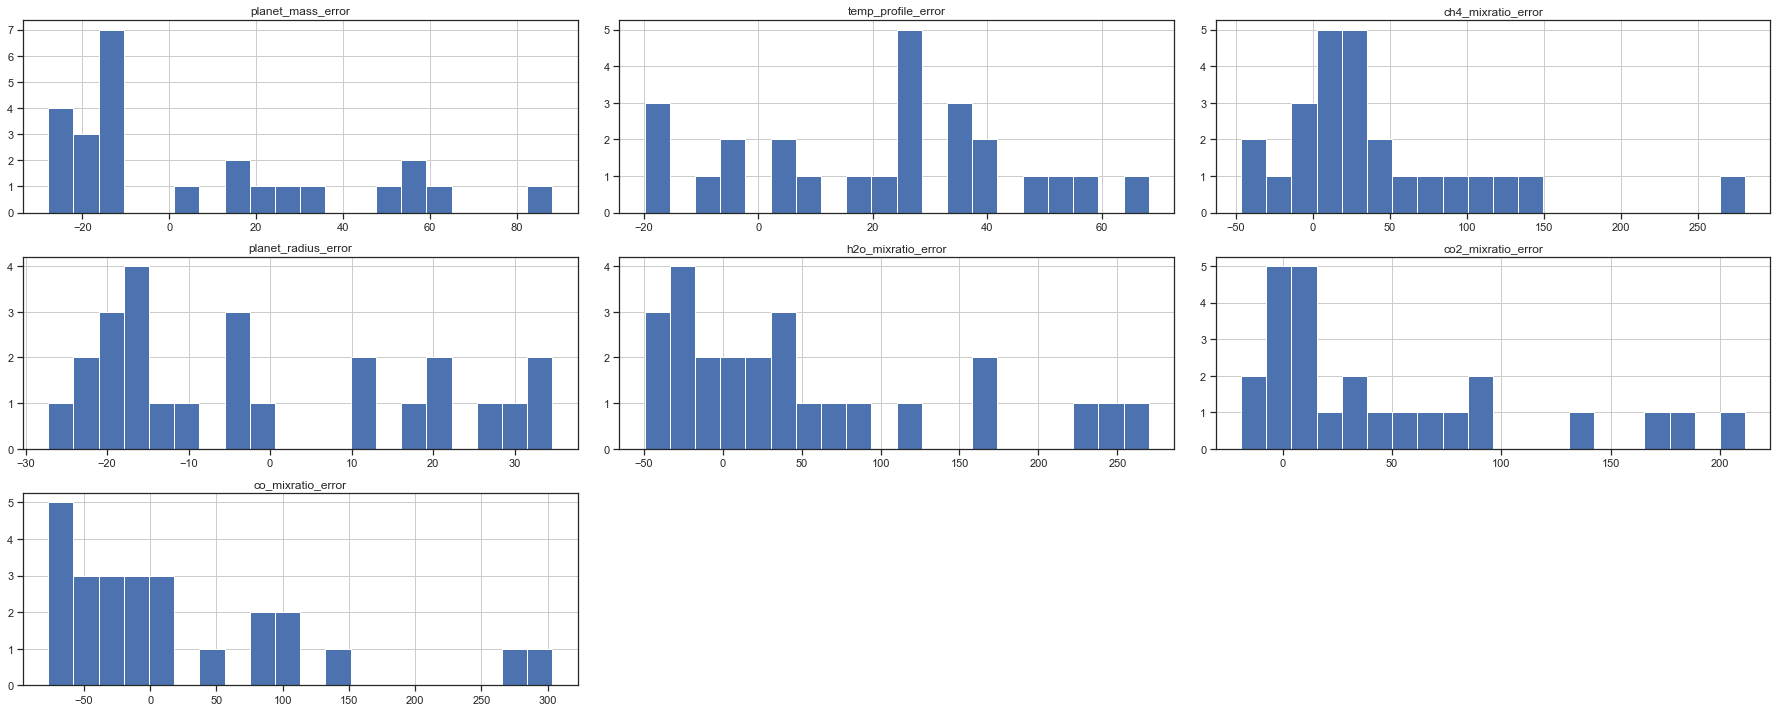

In [4]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

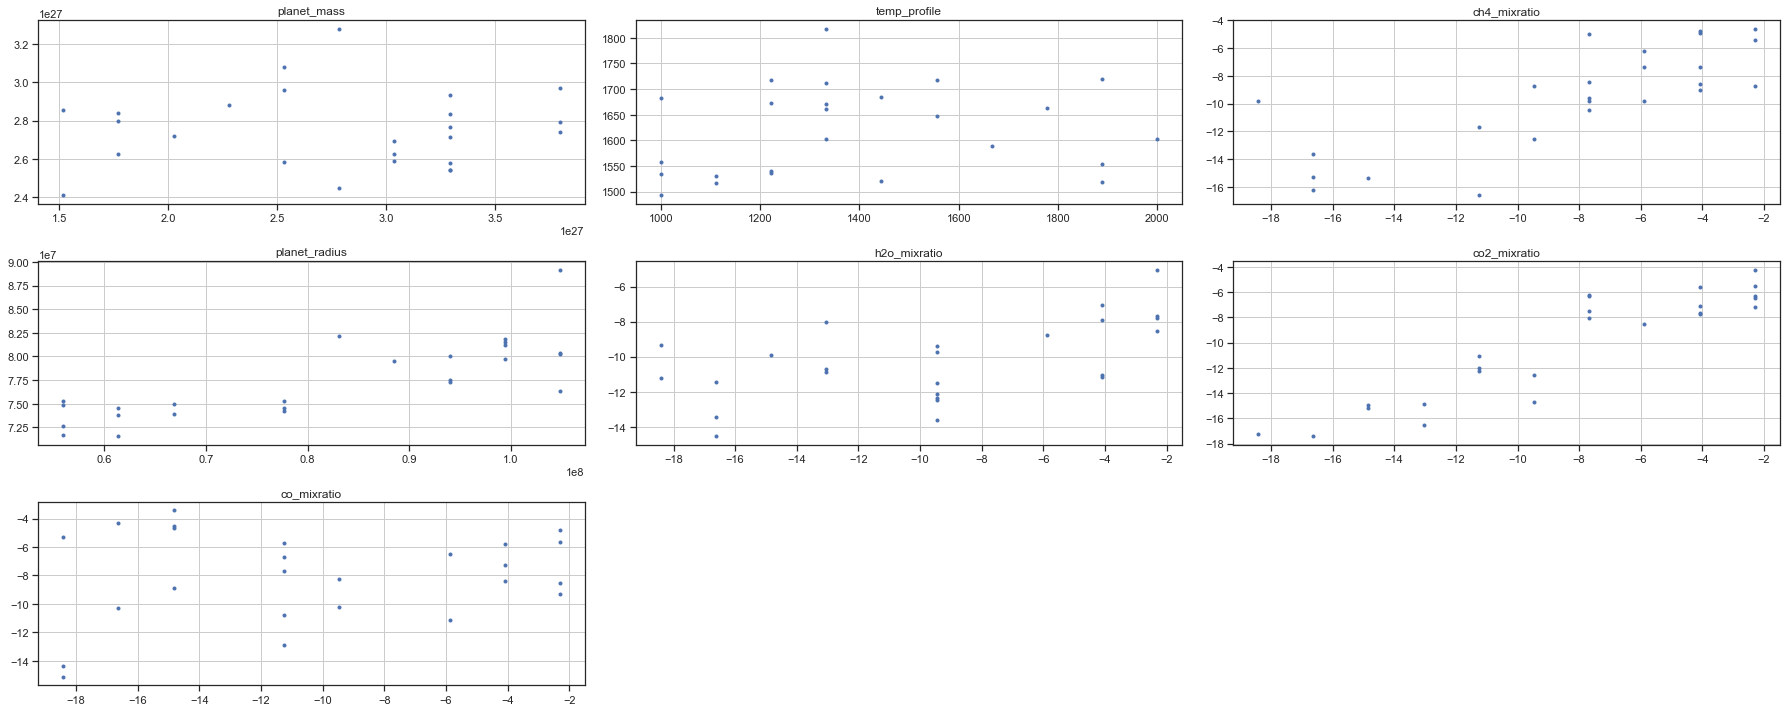

In [5]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param)
    plt.plot(df[param+'_real'], df[param+'_inpainted'], '.')
    plt.grid()
    plt.tight_layout()

Looks like the NN only outputs one value... Which by analysing the images isn't the case. So the decoding is wrong